In [4]:
# !pip install tensorflow

In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [11]:
len(x_train)

60000

In [12]:
len(x_test)

10000

In [13]:
x_train[0].shape

(28, 28)

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

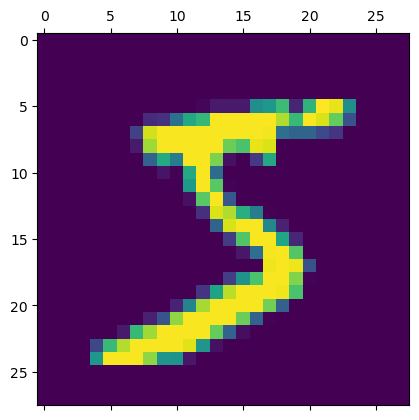

In [20]:
plt.matshow(x_train[0])

In [23]:
y_train[0]

5

In [25]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [28]:
x_train.shape

(60000, 28, 28)

In [35]:
x_train=x_train/255
x_test=x_test/255

In [36]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [37]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [38]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 727us/step - loss: 0.4686 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 1s 787us/step - loss: 0.3042 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 1s 702us/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 723us/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.2667 - accuracy: 0.9252


In [39]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 757us/step - loss: 0.2670 - accuracy: 0.9260


[0.26697850227355957, 0.9259999990463257]

In [58]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 0s 656us/step


In [59]:
y_predicted[1]

array([1.5705101e-01, 9.2666394e-01, 9.9999964e-01, 9.5543486e-01,
       1.9724006e-10, 8.7288189e-01, 8.0202878e-01, 2.5314012e-07,
       9.8091823e-01, 6.5322945e-07], dtype=float32)

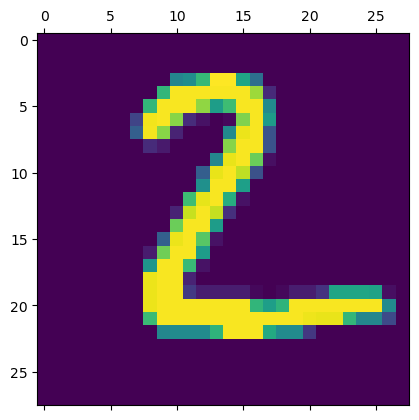

In [60]:
plt.matshow(x_test[1])

In [61]:
y_predicted_lables=[np.argmax(i) for i in y_predicted]

In [62]:
np.argmax(y_predicted[1])

2

In [63]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    0,    1,    1,    9,    2,    1,    0],
       [   0, 1121,    3,    1,    0,    2,    4,    0,    4,    0],
       [   4,    2, 1002,    3,    1,    0,    8,    3,    8,    1],
       [   1,    0,    2,  988,    0,    7,    0,    4,    3,    5],
       [   0,    0,    0,    1,  947,    1,   11,    1,    3,   18],
       [   1,    0,    1,    6,    0,  865,    9,    2,    6,    2],
       [   3,    2,    0,    1,    1,    3,  946,    0,    2,    0],
       [   1,    6,    9,    3,    1,    0,    0, 1001,    3,    4],
       [   2,    0,    1,    6,    3,    4,    4,    4,  946,    4],
       [   1,    5,    0,    5,    7,    3,    1,    6,    3,  978]])>

Text(95.72222222222221, 0.5, 'Truth')

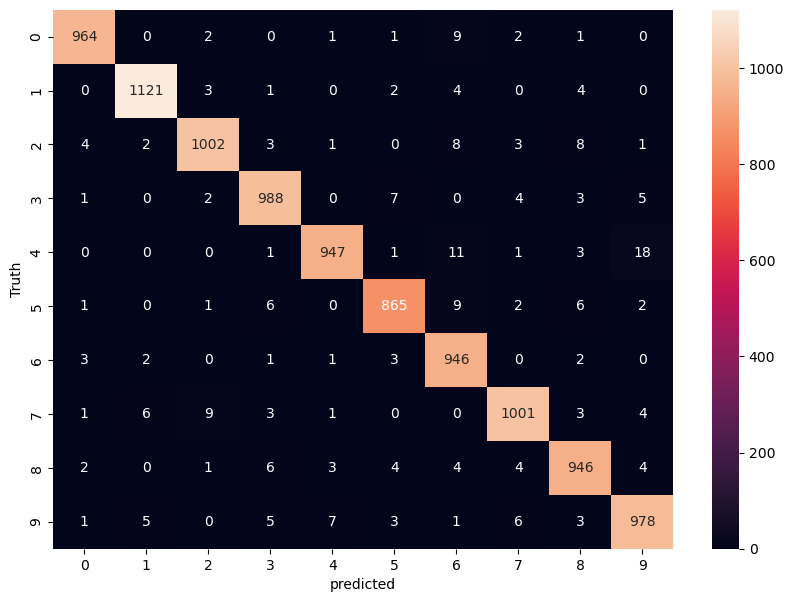

In [64]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [56]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.2705 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1204 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0850 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0640 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0516 - accuracy: 0.9841


In [57]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 642us/step - loss: 0.0781 - accuracy: 0.9758


[0.07809610664844513, 0.9757999777793884]

In [68]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2782 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1288 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0910 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0691 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0541 - accuracy: 0.9833
